Author: KuoChen Huang

## 1. Tree-Based Methods

### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [1]:
import numpy as np
import pandas as pd

In [2]:
training_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)
testing_data = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)

training_data.replace('na', np.nan, inplace=True)
testing_data.replace('na',np.nan, inplace=True)

### (b) Data Preparation

This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea.

#### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

1. Replacing with Mean/Median/Mode
2. Predicting the missing value with Models

In [3]:
from sklearn.impute import SimpleImputer

# I'll use mean to replace the NAN
SIP = SimpleImputer(missing_values = np.nan, strategy = 'mean')

training_y = training_data['class']
training_x = training_data.drop(['class'], axis=1)
testing_y = testing_data['class']
testing_x = testing_data.drop(['class'], axis=1)

In [4]:
columns = training_x.columns # store the column name 
# return an array
training_x = SIP.fit_transform(training_x) 
testing_x = SIP.fit_transform(testing_x)
# transform into dataframe
training_x = pd.DataFrame(training_x, columns = columns)
testing_x = pd.DataFrame(testing_x, columns = columns)

training_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


#### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean.

In [5]:
# Here, I'll just use training dataset to calculate the CV
cv = training_x.std()/training_x.mean()
cv_df = pd.DataFrame(cv)
cv_df

,0
aa_000,2.450938
ab_000,2.328400
ac_000,2.169767
ad_000,183.847620
ae_000,23.190937
...,...
ee_007,4.962483
ee_008,3.222010
ee_009,5.626979
ef_000,47.124953


#### iii. Plot a correlation matrix for your features using pandas or any other tool.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

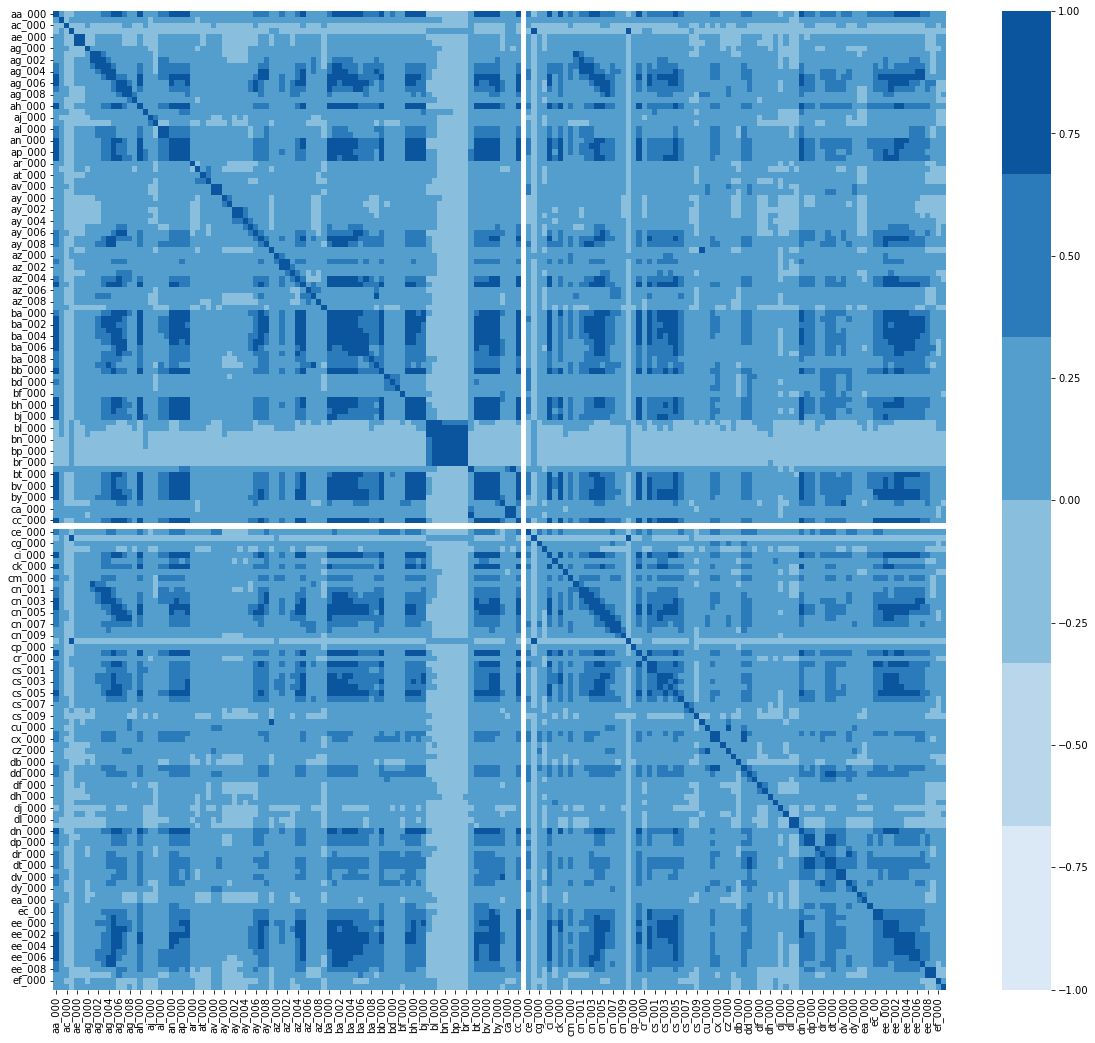

In [7]:
correlation = training_x.corr()
fig = plt.figure(figsize=(20, 18))
sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = sns.color_palette("Blues"))
plt.show()

#### iv. Pick⌊170**0.5⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [8]:
import math

n = math.floor(pow(170,0.5))
cv_sorting = cv.sort_values(ascending=False)[:n]
cv_sorting_index = cv_sorting.index.to_list()

# combine training_x and training_y as training_data
cv_sorting_index.append('class')
training_data = pd.concat([training_x, training_y], axis=1)

training_data[cv_sorting_index].head()

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000,class
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neg
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443,neg
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neg
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neg
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,neg


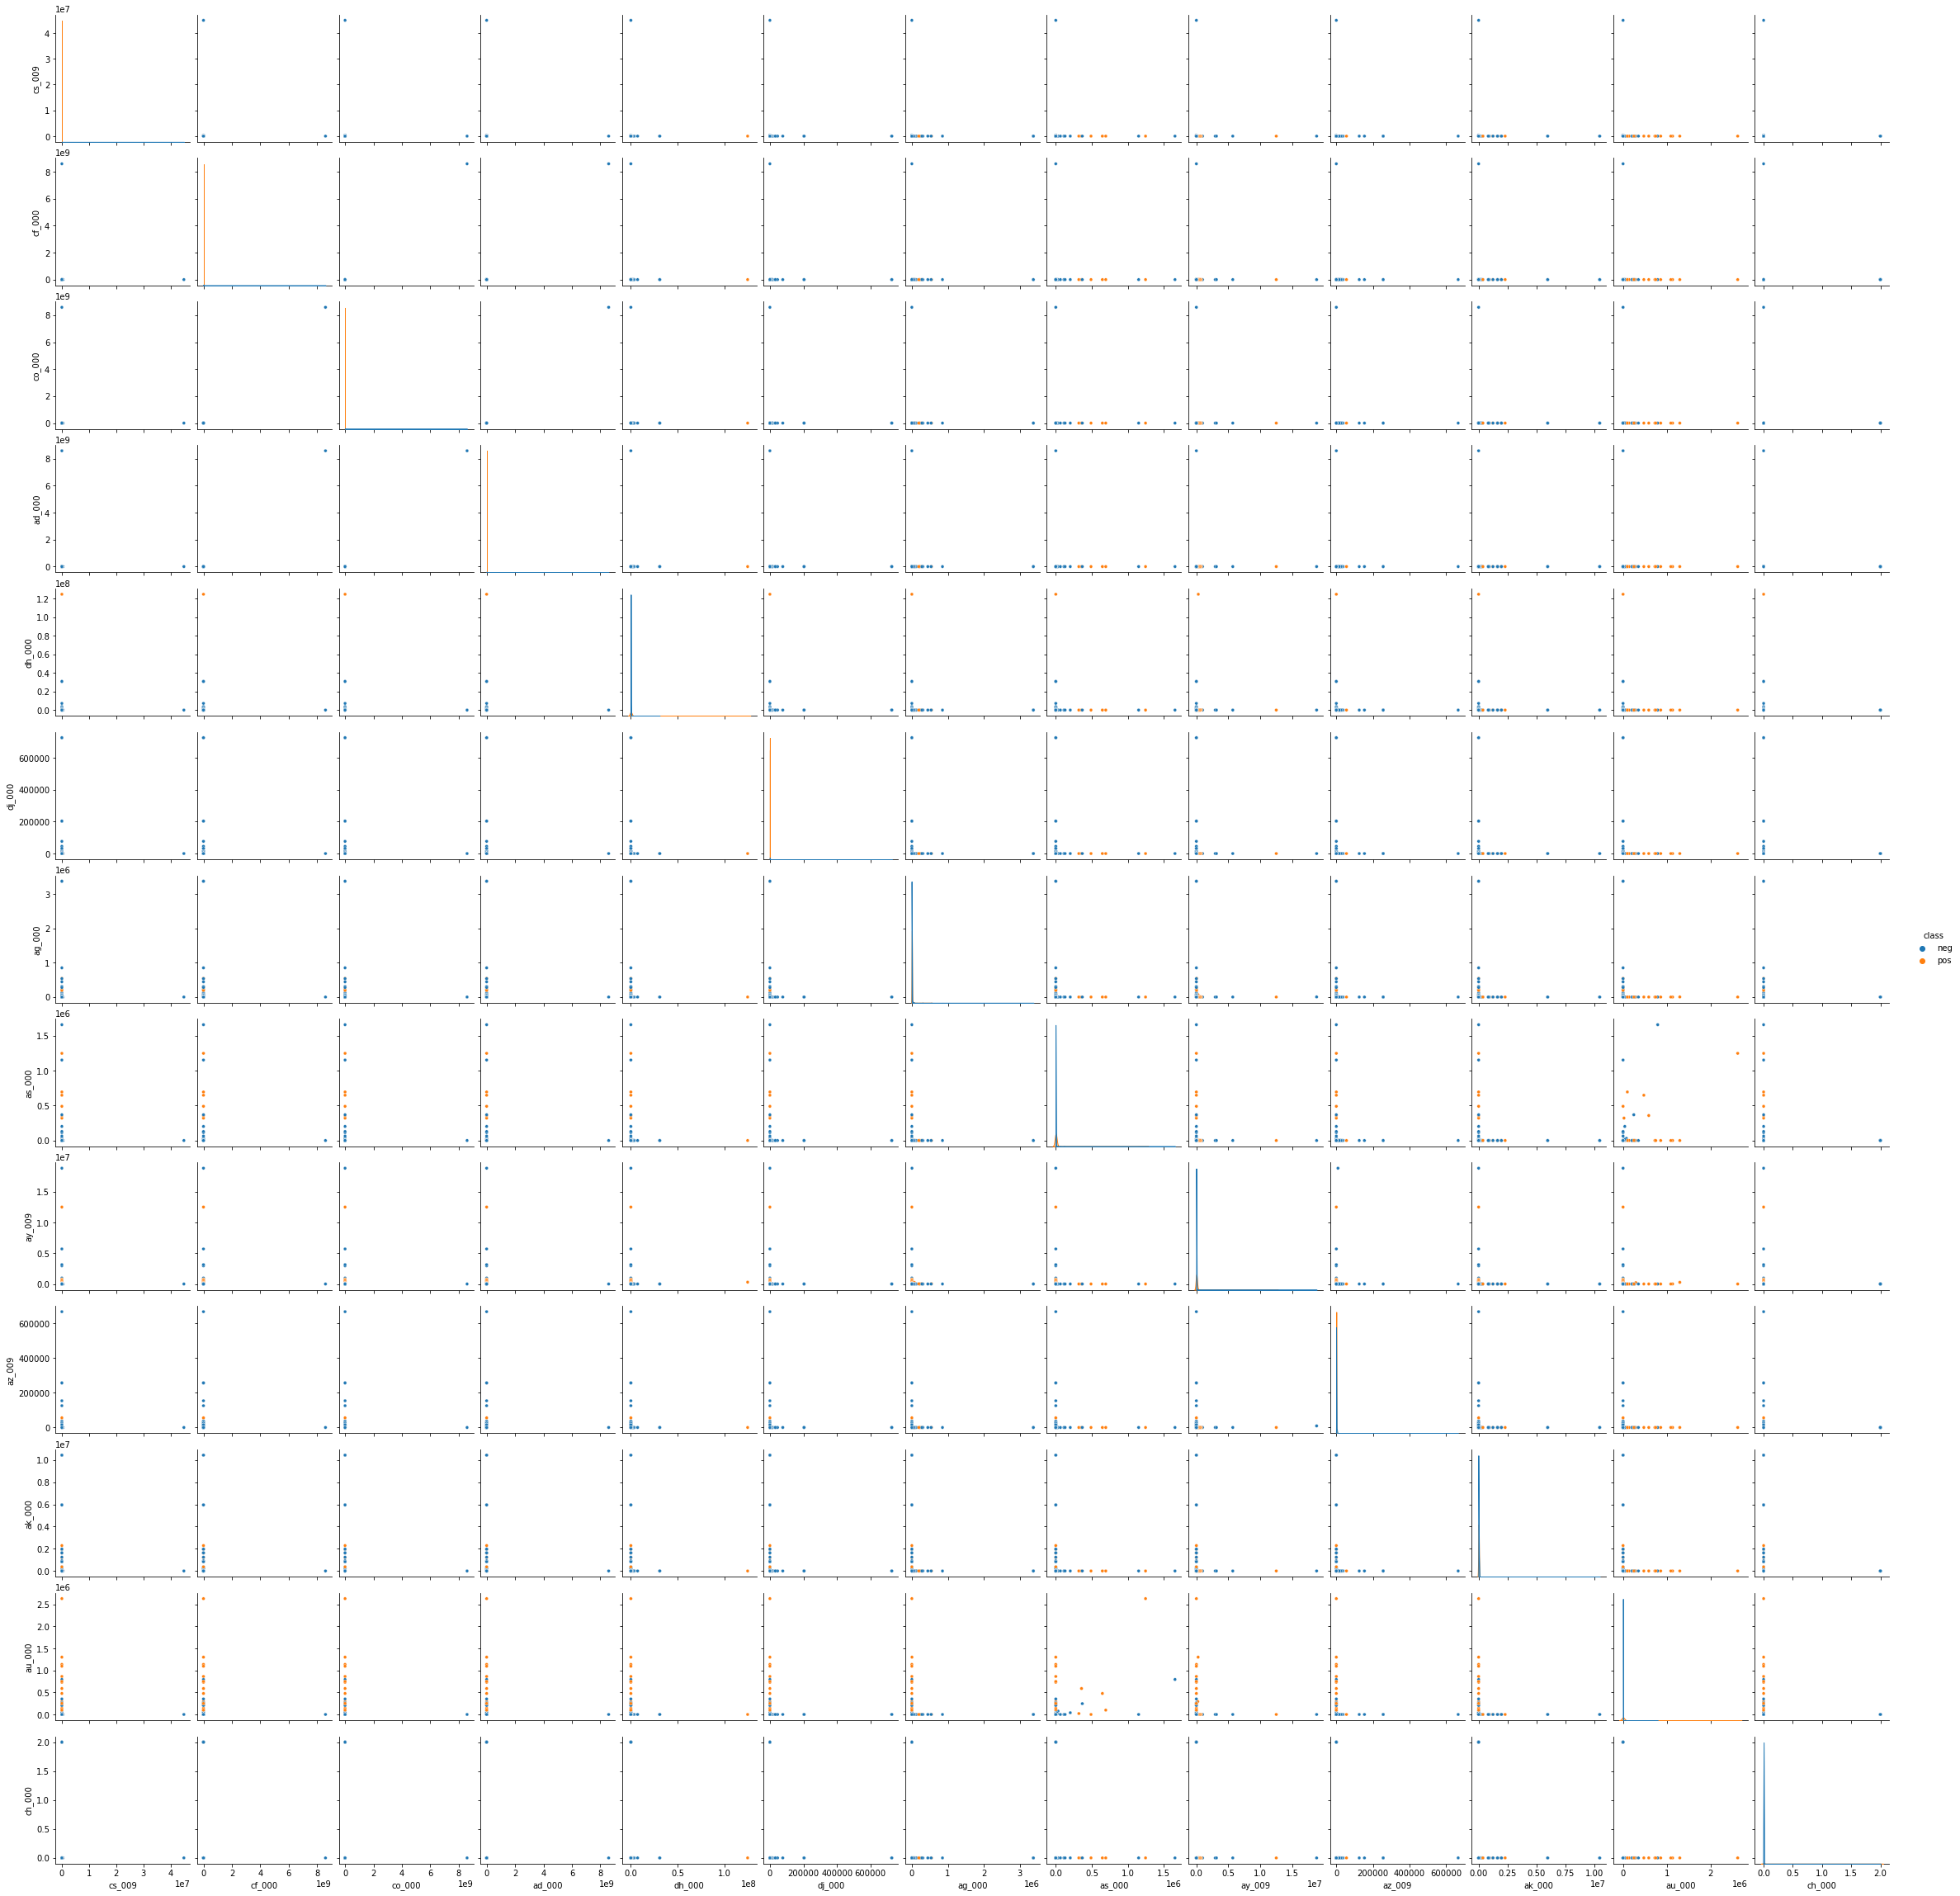

In [9]:
# Scatter Plot
sns.pairplot(training_data[cv_sorting_index], plot_kws={'s':15}, kind = 'scatter', hue = 'class')
plt.show()

It is hard to draw conclusions about significance of these features just by the scatter plots.

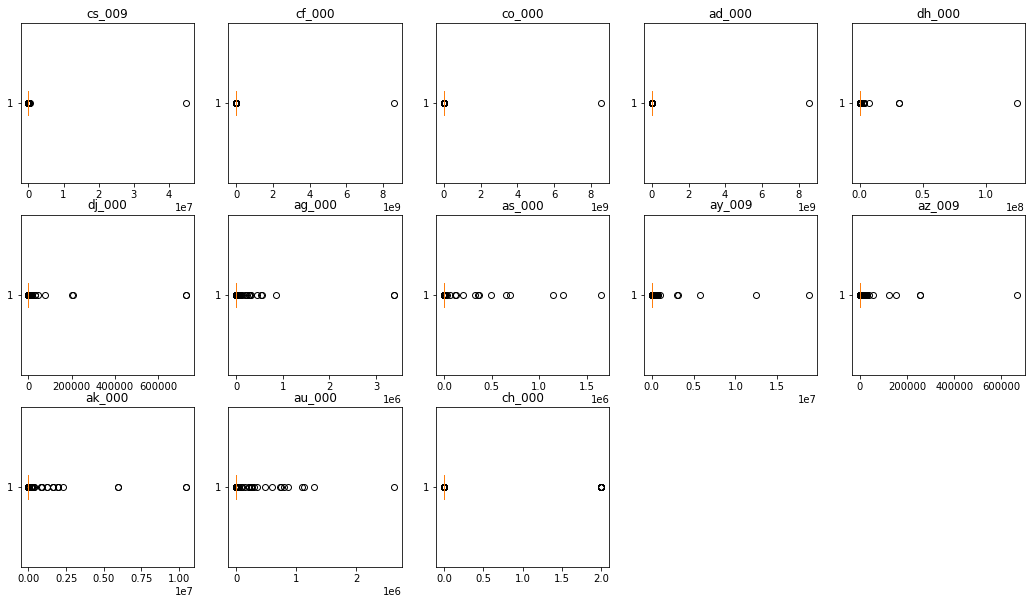

In [10]:
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize=(18, 10))

index = 0
for r in range(0, 3):
    for c in range(0, 5):
        if index < 13:
            ax[r, c].boxplot(training_data.loc[:, cv_sorting_index[index]], vert=False)
            #ax[r, c].grid(True)
            ax[r, c].title.set_text(cv_sorting_index[index])
            c, index = c + 1, index + 1

ax[2, 3].remove()
ax[2, 4].remove()
plt.show()

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [11]:
training_y.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [12]:
testing_y.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

Yes, we can see that the dataset is imbalanced. The number of negative data is much more than the number of positive.

### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

Training

In [14]:
new_training_y = training_y.replace('neg',0).replace('pos',1)
new_testing_y = testing_y.replace('neg',0).replace('pos',1)

# oob_scorebool(default=False) -> Whether to use out-of-bag samples to estimate the generalization score. 
RFC = RandomForestClassifier(n_estimators = 100, random_state = 526, oob_score = True)
# Fit on training data
RFC.fit(training_x, new_training_y)
training_predict_y = RFC.predict(training_x)

In [15]:
confusionMatrix = confusion_matrix(training_predict_y, new_training_y)
print('=============== Training Confusion Matrix ===============')
print(confusionMatrix)

=============== Training Confusion Matrix ===============
[[59000     0]
 [    0  1000]]


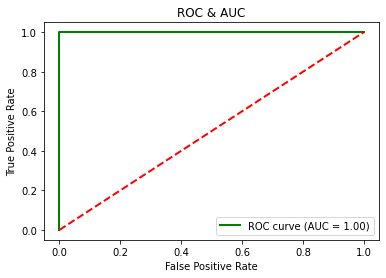

=============== Misclassification Rate ===============
0.0
=============== Out of Bag error ===============
0.00601666666666667


In [16]:
fpr, tpr, threshold = roc_curve(training_predict_y, new_training_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== Misclassification Rate ===============")
print(1-RFC.score(training_x, new_training_y))
print("=============== Out of Bag error ===============")
print(1-RFC.oob_score_)

Testing

In [17]:
testing_predict_y = RFC.predict(testing_x)
confusionMatrix = confusion_matrix(testing_predict_y, new_testing_y)
print('=============== Testing Confusion Matrix ===============')
print(confusionMatrix)

=============== Testing Confusion Matrix ===============
[[15603   106]
 [   22   269]]


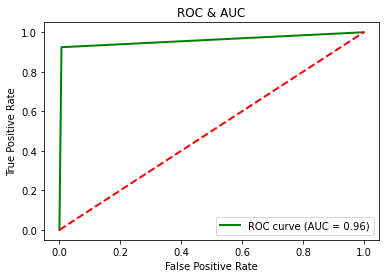

=============== Misclassification Rate ===============
0.008000000000000007


In [18]:
fpr, tpr, threshold = roc_curve(testing_predict_y, new_testing_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== Misclassification Rate ===============")
print(1-RFC.score(testing_x, new_testing_y))

-> Test Error is larger

### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
smote_training_x, smote_training_y = sm.fit_resample(training_x, new_training_y)
smote_testing_x, smote_testing_y = sm.fit_resample(testing_x, new_testing_y)

In [20]:
smote_training_y.value_counts()

0    59000
1    59000
Name: class, dtype: int64

In [21]:
smote_testing_y.value_counts()

0    15625
1    15625
Name: class, dtype: int64

In [22]:
RFC = RandomForestClassifier(n_estimators = 50, random_state = 526, oob_score = True)
# Fit on training data
RFC.fit(smote_training_x, smote_training_y)
smote_training_predict_y = RFC.predict(smote_training_x)

=============== SMOTE Training Confusion Matrix ===============
[[59000     1]
 [    0 58999]]


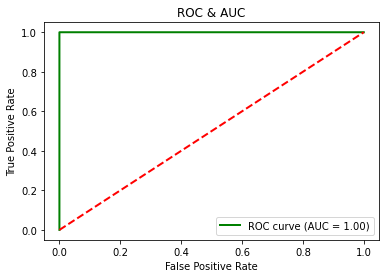

=============== SMOTE Misclassification Rate ===============
8.47457627117798e-06
=============== SMOTE Out of Bag error ===============
0.0031779661016949623


In [23]:
confusionMatrix = confusion_matrix(smote_training_predict_y, smote_training_y)
print('=============== SMOTE Training Confusion Matrix ===============')
print(confusionMatrix)

fpr, tpr, threshold = roc_curve(smote_training_predict_y, smote_training_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== SMOTE Misclassification Rate ===============")
print(1-RFC.score(smote_training_x, smote_training_y))
print("=============== SMOTE Out of Bag error ===============")
print(1-RFC.oob_score_)

=============== SMOTE Testing Confusion Matrix ===============
[[15468   826]
 [  157 14799]]


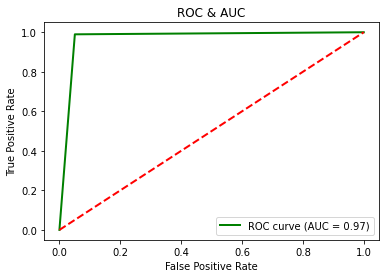

=============== SMOTE Misclassification Rate ===============
0.03145600000000004


In [24]:
smote_testing_predict_y = RFC.predict(smote_testing_x)

confusionMatrix = confusion_matrix(smote_testing_predict_y, smote_testing_y)
print('=============== SMOTE Testing Confusion Matrix ===============')
print(confusionMatrix)

fpr, tpr, threshold = roc_curve(smote_testing_predict_y, smote_testing_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== SMOTE Misclassification Rate ===============")
print(1-RFC.score(smote_testing_x, smote_testing_y))

Findings: After resampling, the OOB error declines, but the misclassification rate in both training and testing dataset rise.

### (e) XGBoost and Model Trees

In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has $\sum_{j=1}^{\infty} \beta_j X_j > s$. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [46]:
import xgboost as xgb
from xgboost import cv
from xgboost import XGBClassifier

In [49]:
xgb_train = xgb.DMatrix(training_x, label = new_training_y)
xgb_test = xgb.DMatrix(testing_x, label = new_testing_y)

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 100]

bestA = 1
bestMSE = 1
for alpha in alphas:
    param = {'max_depth':6, 'learning_rate':0.1, 'objective': 'binary:logistic', 'alpha':alpha}
    xgb_cv_scores = cv(dtrain = xgb_train, params = param, nfold = 5,
                    num_boost_round = 50, early_stopping_rounds=10, metrics = "error", seed = 123)
    #print(xgb_cv_scores)
    # xgb_cv_scores would return train-error-mean/ train-error-std/ test-error-mean/ test-error-std
    xgb_mse = np.mean(xgb_cv_scores['test-error-mean'])

    if xgb_mse < bestMSE:
        bestA = alpha
        bestMSE = xgb_mse
        
print('best alpha: ', bestA)
print('error rate: ',bestMSE)

best alpha:  0.001
error rate:  0.0070443319999999995


In [51]:
xgb1 = XGBClassifier(max_depth = 6, 
                     learning_rate = 0.1,
                     objective = 'binary:logistic',
                     reg_alpha = 1e-3)
xgb1.fit(training_x, new_training_y)

/Users/Charlie/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

=============== XGB Training Confusion Matrix ===============
[[58999    35]
 [    1   965]]


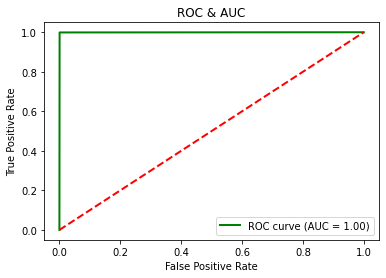

In [57]:
xgb_predict_training_y = xgb1.predict(training_x)

xgb_confusionMatrix = confusion_matrix(xgb_predict_training_y, new_training_y)
print('=============== XGB Training Confusion Matrix ===============')
print(xgb_confusionMatrix)

fpr, tpr, threshold = roc_curve(xgb_predict_training_y, new_training_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

=============== XGB Testing Confusion Matrix ===============
[[15610    94]
 [   15   281]]


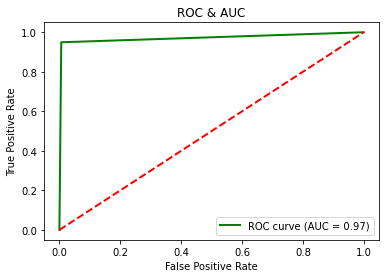

In [56]:
xgb_predict_testing_y = xgb1.predict(testing_x)

xgb_confusionMatrix = confusion_matrix(xgb_predict_testing_y, new_testing_y)
print('=============== XGB Testing Confusion Matrix ===============')
print(xgb_confusionMatrix)

fpr, tpr, threshold = roc_curve(xgb_predict_testing_y, new_testing_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

Although the training error in XGB is slightly higher than RandomForest, the number of misclassification in test dataset is slightly less than RandomForest in this problem. (Bias-Variance Trade off)

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [62]:
# I have run the SMOTE in 1(d), so I would not repeat this step here.
'''
from imblearn.over_sampling import SMOTE

sm = SMOTE()
smote_training_x, smote_training_y = sm.fit_resample(training_x, new_training_y)
smote_testing_x, smote_testing_y = sm.fit_resample(testing_x, new_testing_y)
'''
print("=========== Training value counts after SMOTE ===========")
print(smote_training_y.value_counts())
print("=========== Testing value counts after SMOTE ===========")
print(smote_testing_y.value_counts())

=========== Training value counts after SMOTE ===========
0    59000
1    59000
Name: class, dtype: int64
=========== Testing value counts after SMOTE ===========
0    15625
1    15625
Name: class, dtype: int64


In [63]:
xgb_train = xgb.DMatrix(smote_training_x, label = smote_training_y)
xgb_test = xgb.DMatrix(smote_testing_x, label = smote_testing_y)

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 100]

bestA = 1
bestMSE = 1
for alpha in alphas:
    param = {'max_depth':6, 'learning_rate':0.1, 'objective': 'binary:logistic', 'alpha':alpha}
    xgb_cv_scores = cv(dtrain = xgb_train, params = param, nfold = 5,
                    num_boost_round = 50, early_stopping_rounds=10, metrics = "error", seed = 123)
    #print(xgb_cv_scores)
    # xgb_cv_scores would return train-error-mean/ train-error-std/ test-error-mean/ test-error-std
    xgb_mse = np.mean(xgb_cv_scores['test-error-mean'])

    if xgb_mse < bestMSE:
        bestA = alpha
        bestMSE = xgb_mse
        
print('best alpha: ', bestA)
print('error rate: ',bestMSE)

best alpha:  0.0001
error rate:  0.014346780000000005


In [65]:
xgb2 = XGBClassifier(max_depth = 6, 
                     learning_rate = 0.1,
                     objective = 'binary:logistic',
                     reg_alpha = 1e-4)
xgb2.fit(smote_training_x, smote_training_y)

[11:57:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.0001, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

=============== XGB With SMOTE Training Confusion Matrix ===============
[[58879    44]
 [  121 58956]]


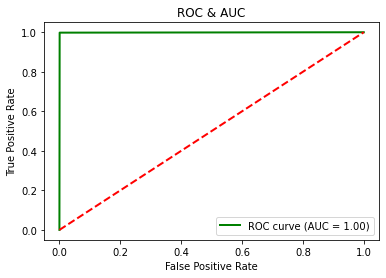

=============== XGB SMOTE Training Misclassification Rate ===============
0.00139830508474581


In [72]:
xgb_smote_predict_training_y = xgb2.predict(smote_training_x)

xgb_smote_confusionMatrix = confusion_matrix(xgb_smote_predict_training_y, smote_training_y)
print('=============== XGB With SMOTE Training Confusion Matrix ===============')
print(xgb_smote_confusionMatrix)

fpr, tpr, threshold = roc_curve(xgb_smote_predict_training_y, smote_training_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== XGB SMOTE Training Misclassification Rate ===============")
print(1-xgb2.score(smote_training_x, smote_training_y))

=============== XGB With SMOTE Testing Confusion Matrix ===============
[[15335   266]
 [  290 15359]]


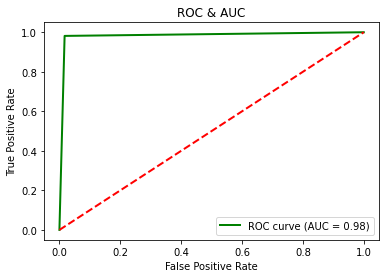

=============== XGB SMOTE Testing Misclassification Rate ===============
0.01779200000000003


In [70]:
xgb_smote_predict_testing_y = xgb2.predict(smote_testing_x)

xgb_smote_confusionMatrix = confusion_matrix(xgb_smote_predict_testing_y, smote_testing_y)
print('=============== XGB With SMOTE Testing Confusion Matrix ===============')
print(xgb_smote_confusionMatrix)

fpr, tpr, threshold = roc_curve(xgb_smote_predict_testing_y, smote_testing_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve (AUC = %0.2f)' % roc_auc, lw = 2)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend(loc = "lower right")
plt.show()

print("=============== XGB SMOTE Testing Misclassification Rate ===============")
print(1-xgb2.score(smote_testing_x, smote_testing_y))